In [17]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from glob import glob
from os.path import join, abspath
from os import pardir, mkdir
from matplotlib.ticker import LinearLocator

plt.style.use('seaborn-v0_8-whitegrid') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
comp_dir = join(root_data_dir, "Effective-Volume")
spec_dir = join(root_data_dir, "Spectral-Class")

In [3]:
name = "Number-Density"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [7]:
comp_raw = vaex.open(join(comp_dir, "comp-AG-extended-per-jk.hdf5"))
comp_raw

#,comp_per_jk,JK,z
0,4.065087458017731e-07,-0.10790019035339356,-197.97979797979798
1,4.066489829383611e-07,-0.10790019035339356,-193.93939393939394
2,4.0675994626761364e-07,-0.10790019035339356,-189.8989898989899
3,4.066662877258087e-07,-0.10790019035339356,-185.85858585858585
4,4.062522245460711e-07,-0.10790019035339356,-181.8181818181818
...,...,...,...
"9,994",0.0002547577683630798,0.43089966773986815,181.81818181818187
"9,995",0.00025547130521733373,0.43089966773986815,185.85858585858588
"9,996",0.00025621215641665395,0.43089966773986815,189.8989898989899
"9,997",0.0002569671193809494,0.43089966773986815,193.93939393939394


In [8]:
z = comp_raw.z.to_numpy()
z = np.unique(z)

JK = comp_raw.JK.to_numpy()
JK = np.unique(JK)

comp = np.zeros((len(z), len(JK)))
for i in range(len(z)):
    comp[i] = comp_raw[comp_raw.z == z[i]].comp_per_jk.to_numpy()
comp

array([[4.06508746e-07, 2.30299184e-06, 1.02982594e-05, ...,
        7.05380164e-03, 1.48700062e-03, 2.57721918e-04],
       [4.06648983e-07, 2.30331467e-06, 1.02994509e-05, ...,
        7.03476195e-03, 1.48276222e-03, 2.56967119e-04],
       [4.06759946e-07, 2.30382739e-06, 1.03011490e-05, ...,
        7.01651448e-03, 1.47861505e-03, 2.56212156e-04],
       ...,
       [4.06759946e-07, 2.30382739e-06, 1.03011490e-05, ...,
        7.01651448e-03, 1.47861505e-03, 2.56212156e-04],
       [4.06648983e-07, 2.30331467e-06, 1.02994509e-05, ...,
        7.03476195e-03, 1.48276222e-03, 2.56967119e-04],
       [4.06508746e-07, 2.30299184e-06, 1.02982594e-05, ...,
        7.05380164e-03, 1.48700062e-03, 2.57721918e-04]])

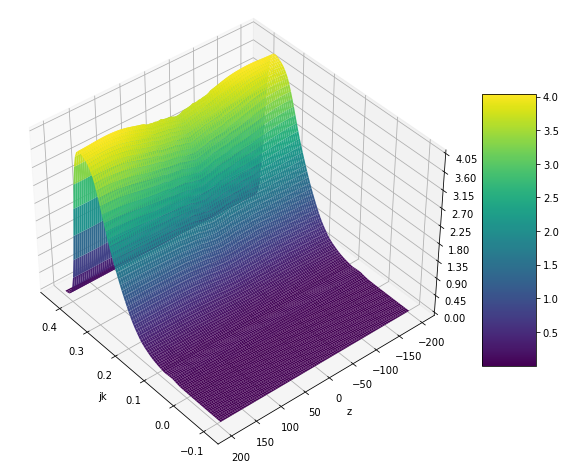

In [9]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
jk, zz = np.meshgrid(JK,z) 
surf = ax.plot_surface(jk, zz, comp, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=140)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [10]:
comp_interp_ = interpolate.interp2d(JK, z, comp, kind='linear', fill_value=0)
comp_interp = lambda jk, zz: np.maximum(comp_interp_(jk, zz), 0)

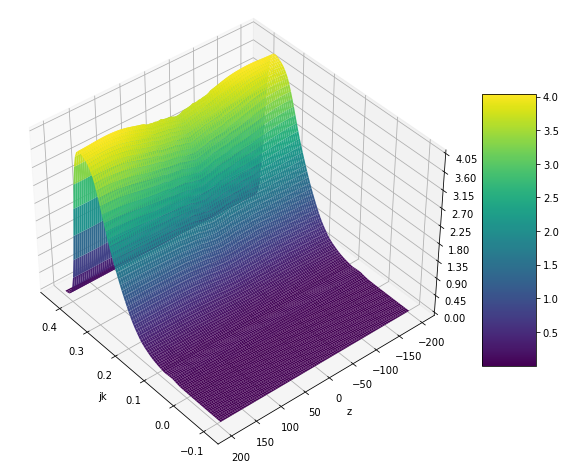

In [11]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
jk, zz = np.meshgrid(JK,z) 
surf = ax.plot_surface(jk, zz, comp, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=140)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [12]:
comp_interp_ = interpolate.interp2d(JK, z, comp, kind='linear', fill_value=0)
comp_interp = lambda jk, zz: np.maximum(comp_interp_(jk, zz), 0)

Text(0, 0.5, 'compz')

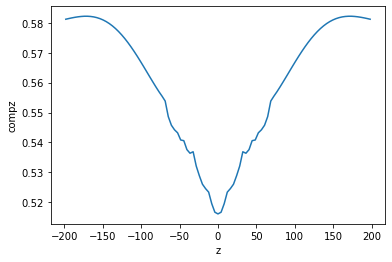

In [13]:
Delta = (JK[1] - JK[0])
compzz = np.sum(comp, axis=1)*Delta
plt.plot(z, compzz)
plt.xlabel("z")
plt.ylabel("compz")
# plt.ylim(0.5,1)

In [14]:
compz_int = interpolate.interp1d(z, compzz, kind='linear', fill_value=0)

In [15]:
df = vaex.open(join(spec_dir, "thin-AG-extended-filtered.hdf5"))
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

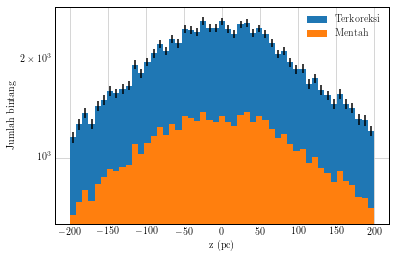

In [22]:
zedge = np.linspace(-200, 200, 50)
znum, _ = np.histogram(df.z.to_numpy(), bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
znum_corr = znum/compz_int(zmid)
zerr = znum_corr/np.sqrt(znum)
plt.bar(zmid, znum_corr, width=zedge[1]-zedge[0], label="Terkoreksi")
plt.errorbar(zmid, znum_corr, yerr=zerr, fmt='none', c='k')
plt.bar(zmid, znum, width=zedge[1]-zedge[0], label="Mentah")
plt.xlabel("z (pc)")
plt.ylabel("Jumlah bintang")
plt.yscale("log")
plt.legend()
plt.savefig("vertical-number.pdf")
plt.show()